<a href="https://colab.research.google.com/github/jaybeberry9591/advance_machine_learning/blob/main/LSTM_model_for_bengali_alphabets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load dataset

paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/processed_audio'):
  for filename in filenames:
    paths.append(os.path.join(dirname,filename))
    label = filename.split('_')[0]
    labels.append(label)
    # print(filename)
    # print(label)
    # break

print("Dataset is loaded.")


Dataset is loaded.


In [ ]:
paths[:5]

['/content/drive/MyDrive/processed_audio/ঔ_7.wav',
 '/content/drive/MyDrive/processed_audio/অ_7.wav',
 '/content/drive/MyDrive/processed_audio/আ_7.wav',
 '/content/drive/MyDrive/processed_audio/ও_7.wav',
 '/content/drive/MyDrive/processed_audio/ঈ_7.wav']

In [ ]:
labels[:11]

['ঔ', 'অ', 'আ', 'ও', 'ঈ', 'ই', 'ঋ', 'এ', 'ঊ', 'উ', 'ঐ']

In [ ]:
## Create dataframe

df = pd.DataFrame()
df ['speech'] = paths
df ['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/processed_audio/ঔ_7.wav,ঔ
1,/content/drive/MyDrive/processed_audio/অ_7.wav,অ
2,/content/drive/MyDrive/processed_audio/আ_7.wav,আ
3,/content/drive/MyDrive/processed_audio/ও_7.wav,ও
4,/content/drive/MyDrive/processed_audio/ঈ_7.wav,ঈ


In [ ]:
df['label'].value_counts()

ঔ    7
অ    7
আ    7
ও    7
ঈ    7
ই    7
ঋ    7
এ    7
ঊ    7
উ    7
ঐ    7
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

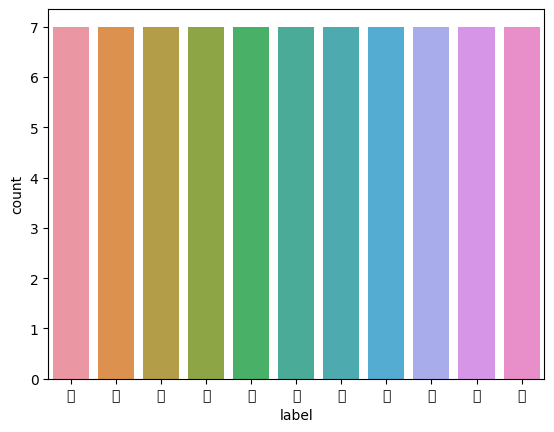

In [ ]:
sns.countplot(data=df, x ='label')

In [ ]:
# exploratory data analysis

def waveplot(data,sr, emotion):
  plt.figure(figsize=(10,4))
  plt.title(emotion, size=20)
  librosa.display.waveshow(data,sr=sr)
  plt.show()

def spectogram(data,sr,emotion):
  x= librosa.stft(data)
  xdb = librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(11,4))
  plt.title(emotion, size=20)
  librosa.display.specshow(xdb,sr=sr, x_axis = 'time', y_axis = 'hz')
  plt.show()




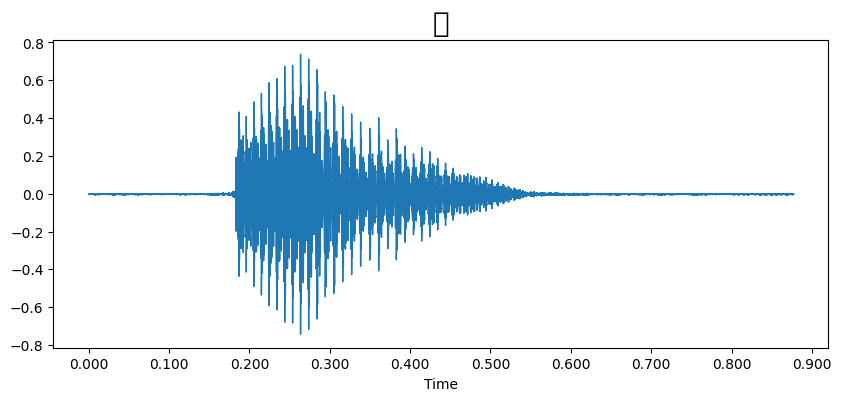

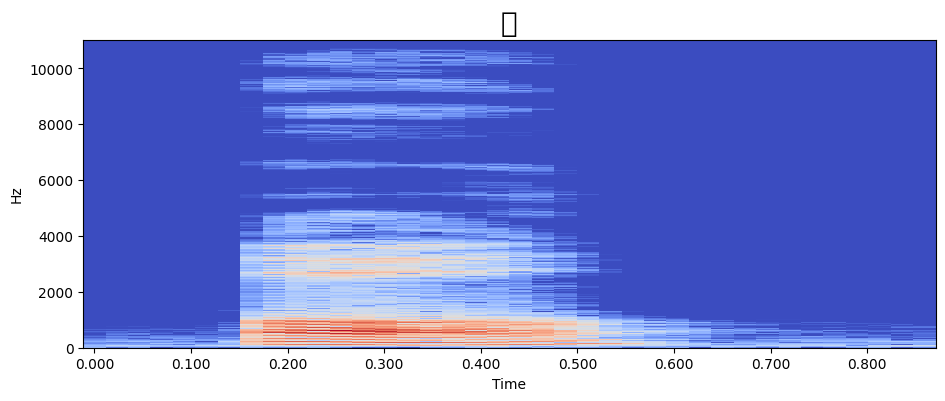

In [ ]:
# vowel one
emotion = 'অ'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram (data,sampling_rate, emotion)
Audio (path)

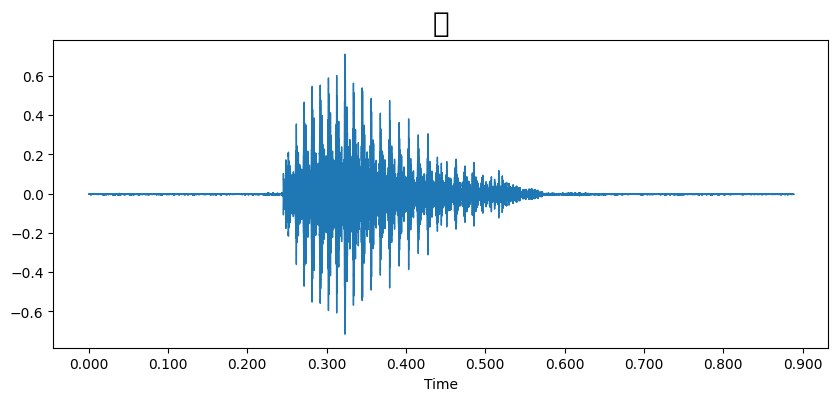

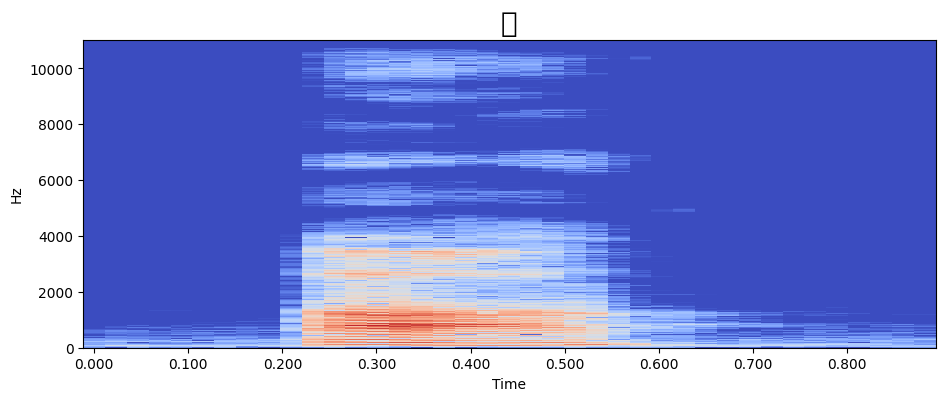

In [ ]:
# two
emotion = 'আ'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram (data,sampling_rate, emotion)
Audio (path)

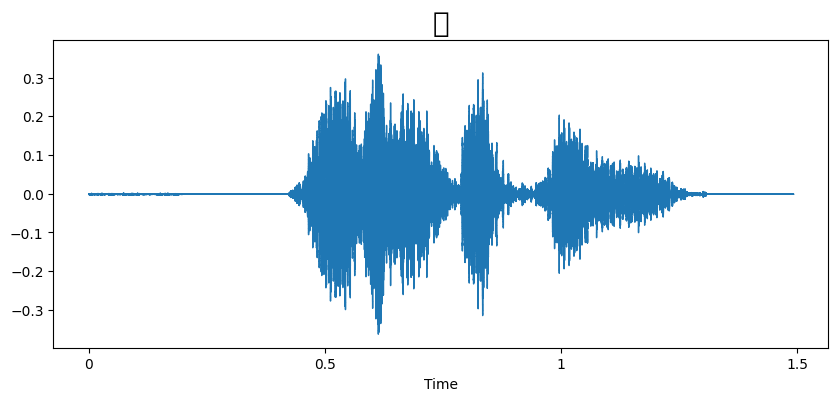

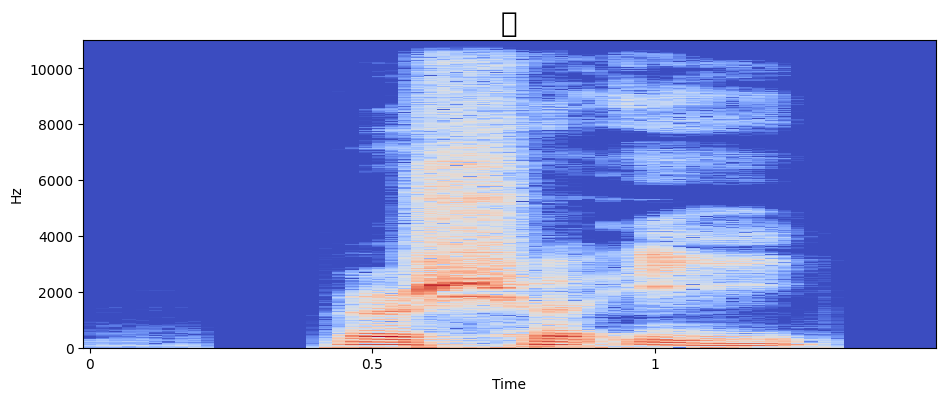

In [ ]:
# three
emotion = 'ই'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram (data,sampling_rate, emotion)
Audio (path)

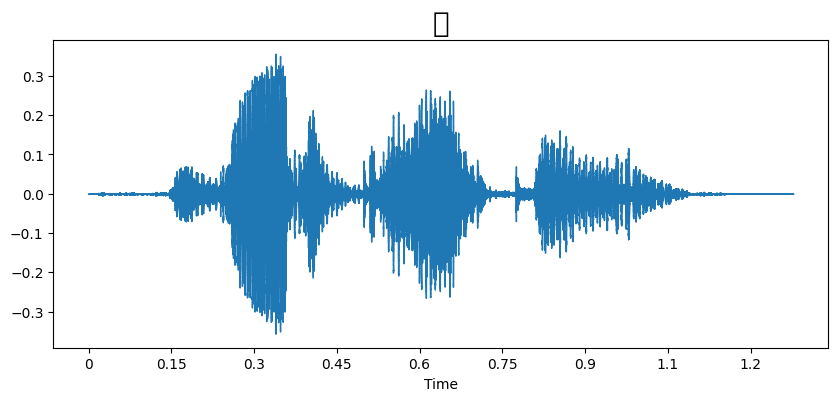

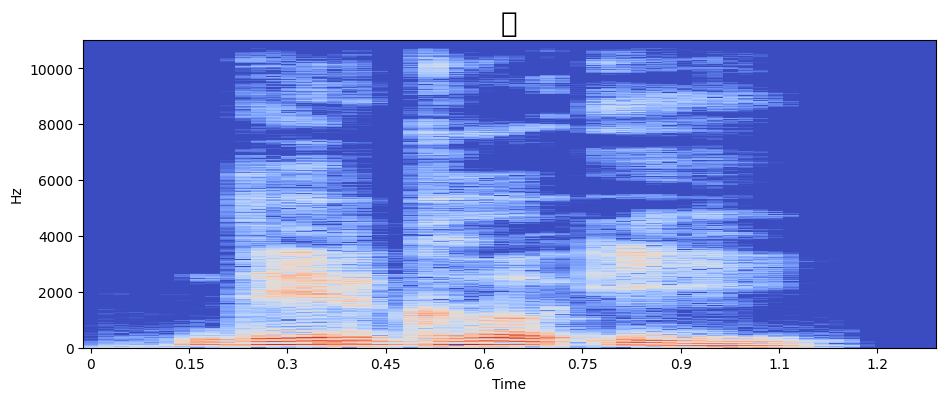

In [ ]:
# four
emotion = 'ঈ'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram (data,sampling_rate, emotion)
Audio (path)

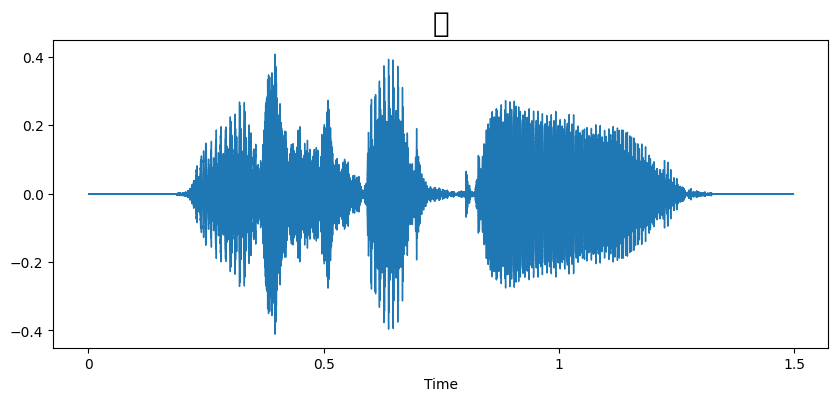

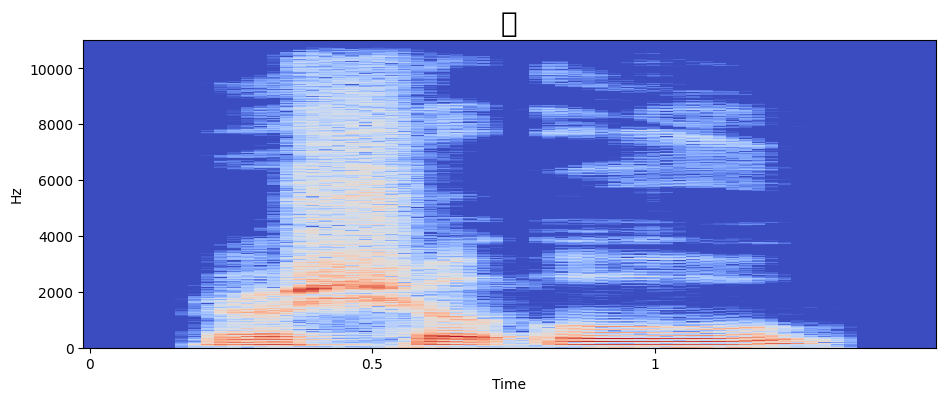

In [ ]:
# five
emotion = 'উ'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram (data,sampling_rate, emotion)
Audio (path)

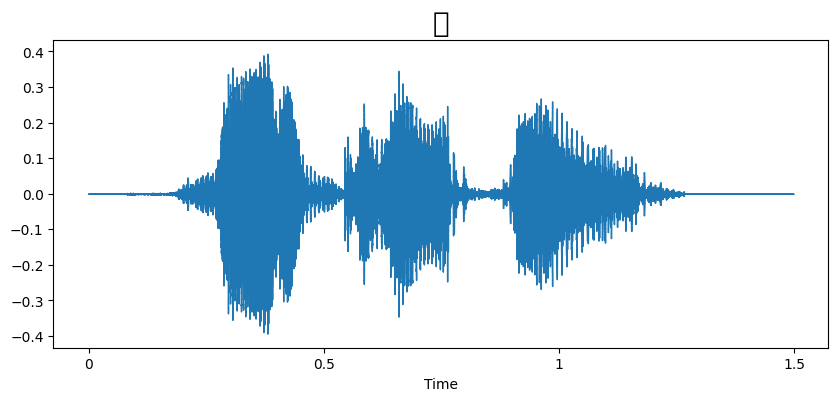

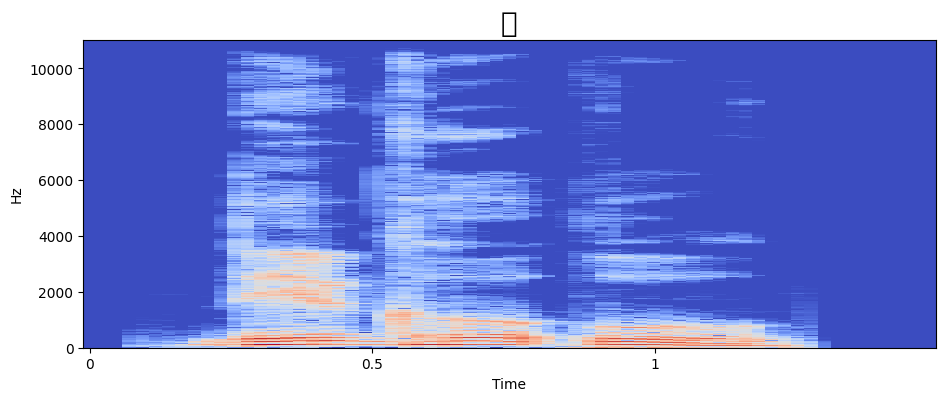

In [ ]:
# six
emotion = 'ঊ'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram (data,sampling_rate, emotion)
Audio (path)

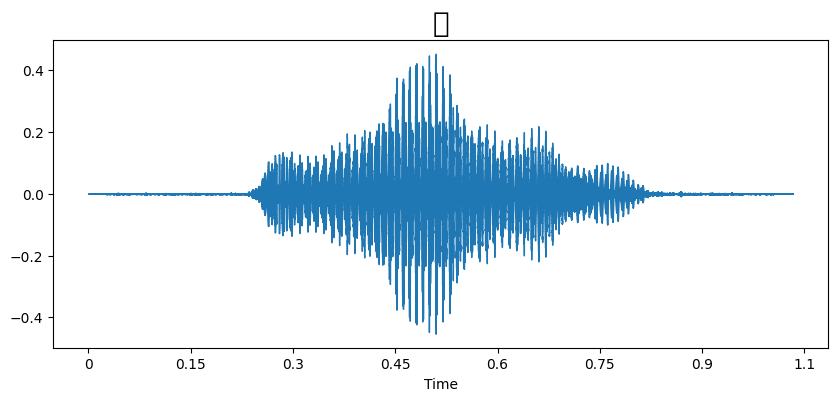

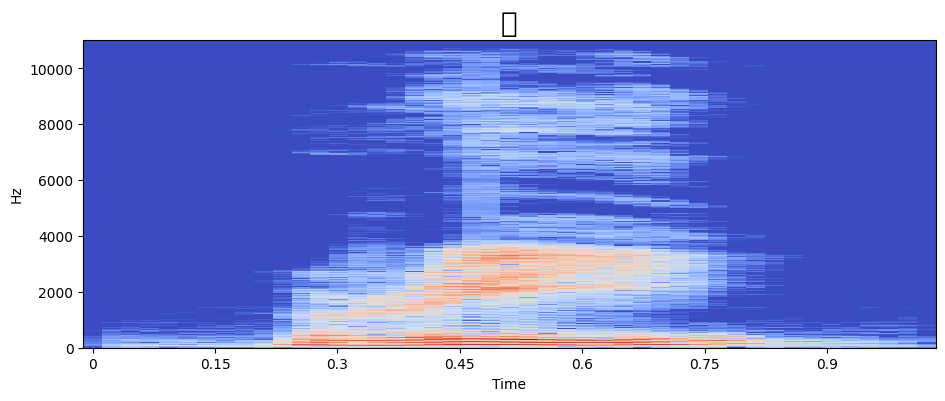

In [ ]:
# seven
emotion = 'ঋ'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram (data,sampling_rate, emotion)
Audio (path)

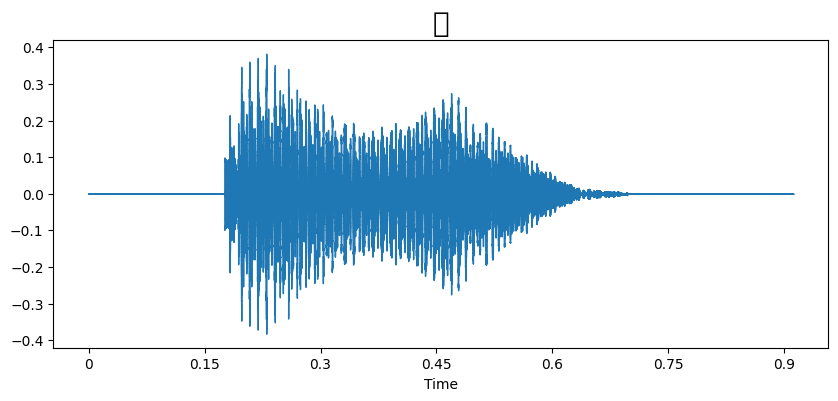

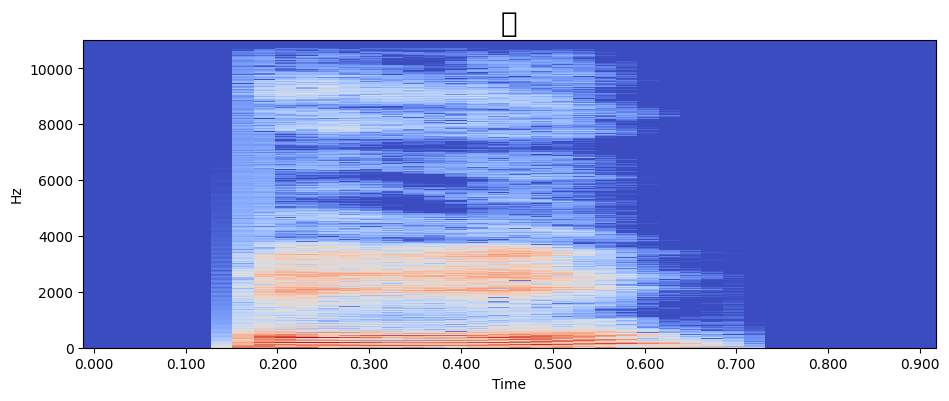

In [ ]:
# eight
emotion = 'এ'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram (data,sampling_rate, emotion)
Audio (path)

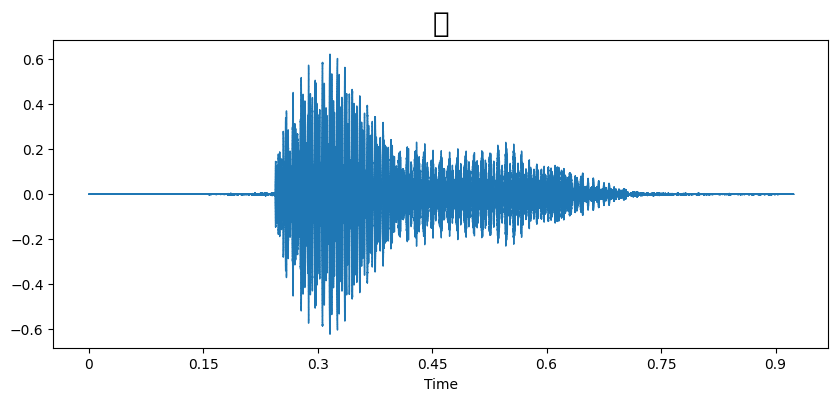

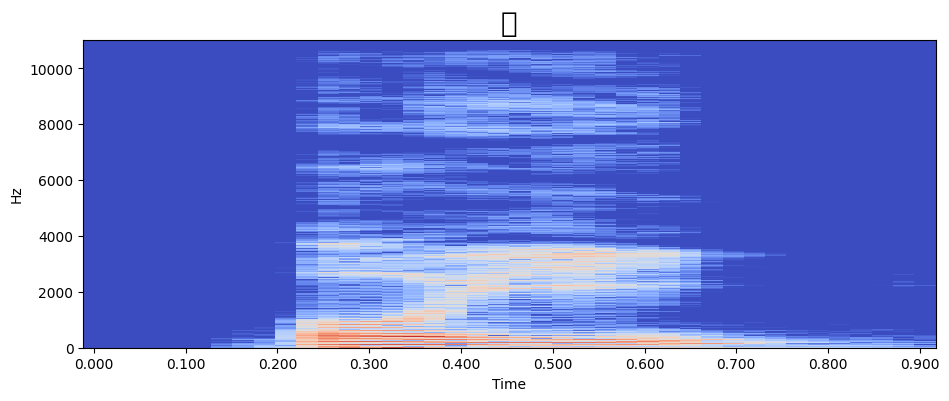

In [ ]:
# nine
emotion = 'ঐ'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram (data,sampling_rate, emotion)
Audio (path)

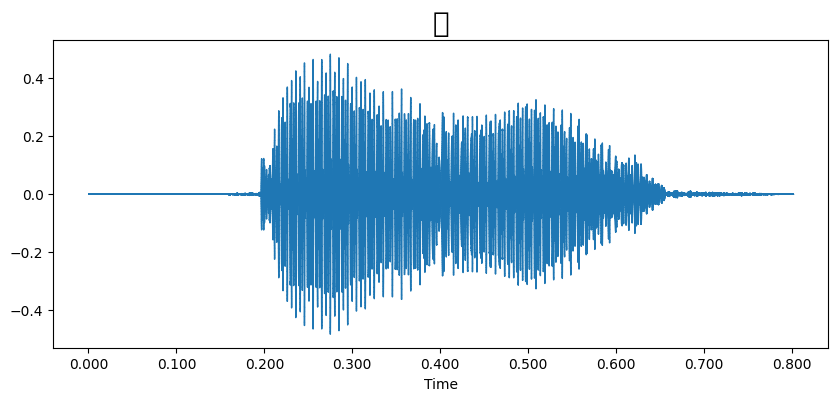

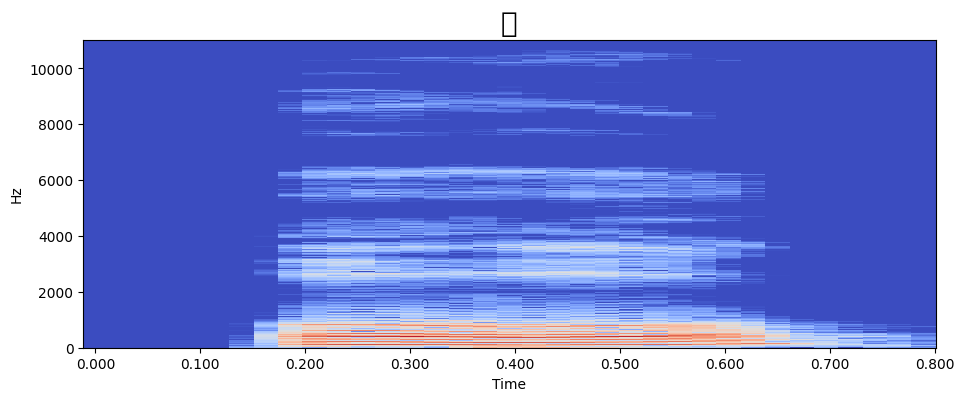

In [ ]:
# ten
emotion = 'ও'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram (data,sampling_rate, emotion)
Audio (path)

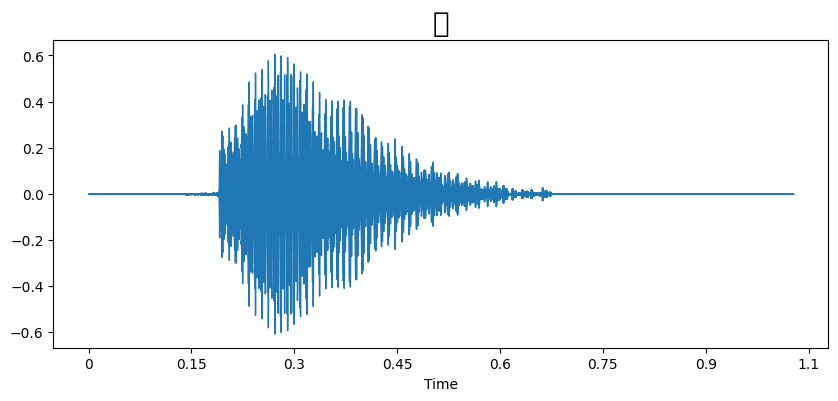

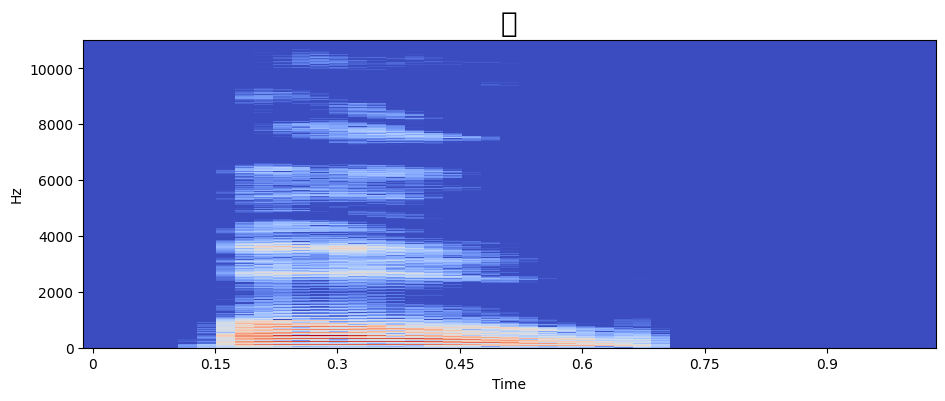

In [ ]:
# eleven
emotion = 'ঔ'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram (data,sampling_rate, emotion)
Audio (path)

In [ ]:
# Feature Extraction

def extract_mfcc(filename):
  y, sr = librosa.load(filename, duration = 3, offset = 0.5)
  mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis =0)
  return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-6.5506116e+02,  7.3098625e+01,  3.6089005e+01,  2.3426582e+01,
        8.6309395e+00, -5.3383780e-01,  6.2326347e-03, -7.9833001e-02,
       -1.5298961e+00,  4.9506873e-02,  1.0366539e+00,  6.7690700e-01,
       -9.0471208e-01, -1.9052085e+00, -1.7697644e+00, -1.9140553e+00,
       -4.4630961e+00, -2.0782466e+00, -6.0557646e-01, -1.3920376e+00,
       -1.4234087e-01,  2.5479617e+00, -3.3131933e-01, -1.5564363e+00,
       -6.3537979e-01,  3.0357972e-02, -2.5708058e+00, -1.9114583e+00,
       -5.3229254e-01,  3.1731150e-01, -1.4550726e+00, -2.1244292e-01,
        8.7624955e-01, -9.1067314e-01, -1.5073379e+00, -4.2928216e-01,
       -2.1395915e+00, -2.5333009e+00, -4.0146002e-01,  1.6266459e-01],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0     [-655.06116, 73.098625, 36.089005, 23.426582, ...
1     [-619.2973, 156.97055, 57.841114, 21.976519, 3...
2     [-573.98615, 153.71553, 34.18189, 2.472029, -2...
3     [-439.66846, 163.14914, 75.7873, 48.812824, -1...
4     [-413.10623, 98.55259, 29.821665, 55.991657, 3...
                            ...                        
72    [-421.1578, 90.957756, 43.432816, 15.25908, 28...
73    [-431.3394, 104.04218, 44.34548, 11.034332, 24...
74    [-425.06937, 101.05391, 39.0349, 10.3076935, 1...
75    [-430.63126, 98.06048, 43.44907, 16.270231, 21...
76    [-344.80603, 132.25714, 38.94091, 2.9669585, 1...
Name: speech, Length: 77, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array (X)
X.shape

(77, 40)

In [ ]:
# input split
X = []


for filename in df['speech']:
    mfcc_features = extract_mfcc(filename)
    X.append(mfcc_features)

X = np.array(X)
X = np.expand_dims(X, -1)
X.shape

(77, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
labels = df[['label']]

# Create an instance of OneHotEncoder
enc = OneHotEncoder()

# Fit and transform the labels
y = enc.fit_transform(labels).toarray()

In [ ]:
y.shape

(77, 11)

In [ ]:
## Creat LSTM Model

from keras.models import Sequential
from keras.layers import Dense, LSTM , Dropout

model = Sequential([
    LSTM(256, return_sequences = False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation= 'relu'),
    Dropout(0.2),
    Dense(64, activation= 'relu'),
    Dropout(0.2),
    Dense(11, activation= 'softmax'),
])

model.compile(loss="categorical_crossentropy", optimizer = 'adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 11)               

In [ ]:
# Train the model

history = model.fit(X,y, validation_split=0.2, epochs = 50, batch_size = 64)

Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 2.4141 - accuracy: 0.0984 - val_loss: 2.4543 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 185ms/step - loss: 2.3780 - accuracy: 0.1148 - val_loss: 2.4930 - val_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 184ms/step - loss: 2.3643 - accuracy: 0.1311 - val_loss: 2.5433 - val_accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 207ms/step - loss: 2.3535 - accuracy: 0.1148 - val_loss: 2.5887 - val_accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 185ms/step - loss: 2.3170 - accuracy: 0.1803 - val_loss: 2.6339 - val_accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 191ms/step - loss: 2.3176 - accuracy: 0.1639 - val_loss: 2.6737 - val_accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 194ms/step - loss: 2.3232 - accuracy: 0.1475 - val_loss: 2.7074 - val_accuracy: 0.0000

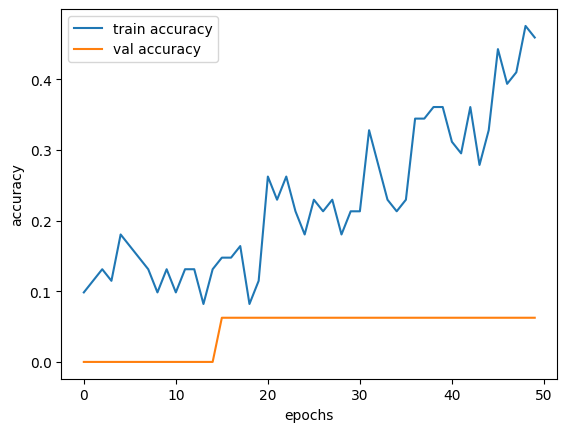

In [ ]:
#Plot Results

epochs = list (range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs,acc,label = 'train accuracy')
plt.plot(epochs, val_acc , label = 'val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

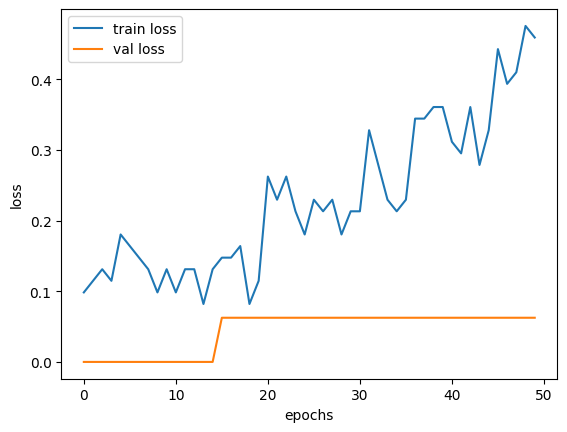

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs,acc,label = 'train loss')
plt.plot(epochs, val_acc , label = 'val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()